# Descriptive statistics

- get overall info about participants
- asses normality of response times (RTs)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

d = pd.read_csv(os.path.join("..", "data", "data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "data_aggregated.csv"), index_col=0)
aggwo = pd.read_csv(os.path.join("..", "data", "data_outliers-replaced_aggregated.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 15768 lines 219 participants


## Overall info about participants

In [19]:
TPP = 72  # there are 72 trials in a session/participant
TPT = 36  # there are 36 trials in a part/test
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / TPP))

print()
print("Fluent vs. non-fluent:")
display(pd.DataFrame(d.groupby("StudyID")["Fluent"].value_counts() / TPP))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / TPP))

print()
print()
print("Different kinds of designers and which font was first:")
for sid in [1, 2]:
    print("Study #%s" % sid)
    dtt = pd.DataFrame(columns=["Designer", "Non-designer", "total"], index=["sansforgetica", "arial", "total"])
    dtt["Designer"] = dt[(dt["StudyID"] == sid) & (dt["TestID"] == 1) & (dt["Type"] == "lexical") & (dt["Training"] != "Non-designer")]["Font"].value_counts()
    dtt["Non-designer"] = dt[(dt["StudyID"] == sid) & (dt["TestID"] == 1) & (dt["Type"] == "lexical") & (dt["Training"] == "Non-designer")]["Font"].value_counts()
    dtt /=  TPL
    dtt["total"] = dtt.T.sum()
    dtt.loc["total"] = dtt.sum()
    display(dtt)

print()
print()
print("JoM for categories of training:")
print()
display(pd.DataFrame(d.groupby(["StudyID", "Training"])["JoM"].mean()))
print()
print()
print("JoL for categories of training:")
print()
display(pd.DataFrame(d.groupby(["StudyID", "Training"])["JoL"].value_counts() / TPT))


Number of participants:


,StudyID
2,122.0
1,97.0



Fluent vs. non-fluent:


Fluent
StudyID Fluent        
1       True      89.0
        False      8.0
2       True     106.0
        False     16.0



Different kinds of designers:


Training
StudyID Training                  
1       Non-designer          44.0
        Letter designer       25.0
        Graphic designer      17.0
        Other designer         6.0
        Typographer            5.0
2       Non-designer          59.0
        Graphic designer      28.0
        Letter designer       16.0
        Other designer        12.0
        Typographer            7.0



Different kinds of designers and which font was first:
Study #1


,Designer,Non-designer,total
sansforgetica,NaN,NaN,0.0
arial,NaN,NaN,0.0
total,0.0,0.0,0.0


Study #2


,Designer,Non-designer,total
sansforgetica,31.0,29.0,60.0
arial,32.0,30.0,62.0
total,63.0,59.0,122.0




JoM for categories of training:



JoM
StudyID Training                   
1       Graphic designer  56.735294
        Letter designer   55.160000
        Non-designer      53.977273
        Other designer    49.166667
        Typographer       61.000000
2       Graphic designer  53.875000
        Letter designer   59.562500
        Non-designer      52.237288
        Other designer    53.083333
        Typographer       59.000000



JoL for categories of training:



JoL
StudyID Training         JoL                         
1       Graphic designer very easy to read       13.0
                         ok                      10.0
                         easy to read             5.0
                         difficult to read        4.0
                         very difficult to read   2.0
        Letter designer  very easy to read       14.0
                         difficult to read       13.0
                         ok                      11.0
                         easy to read             9.0
                         very difficult to read   3.0
        Non-designer     very easy to read       38.0
                         ok                      22.0
                         difficult to read       14.0
                         easy to read            12.0
                         very difficult to read   2.0
        Other designer   very easy to read        5.0
                         ok                       4.0
                         difficult to read        2.0
                         very difficult to read   1.0
        Typographer      very easy to read        4.0
                         difficult to read        3.0
                         ok                       2.0
                         easy to read             1.0
2       Graphic designer very easy to read       23.0
                         difficult to read       12.0
                         ok                      11.0
                         easy to read            10.0
        Letter designer  difficult to read       13.0
                         easy to read             7.0
                         very easy to read        7.0
                         ok                       4.0
                         very difficult to read   1.0
        Non-designer     very easy to read       51.0
                         ok                      26.0
                         difficult to read       18.0
                         easy to read            17.0
                         very difficult to read   6.0
        Other designer   very easy to read        8.0
                         difficult to read        6.0
                         easy to read             5.0
                         ok                       4.0
                         very difficult to read   1.0
        Typographer      ok                       6.0
                         very easy to read        5.0
                         easy to read             3.0

# Asess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RTnorms in lexical task


,W,pval,normal
RTnorm,0.95118,1.909781e-16,False


Normality test for RTnorms in lexical task (outliers replaced)


,W,pval,normal
RTnorm,0.949008,7.829168e-17,False


Normality test for RTnorms in recognition task


,W,pval,normal
RTnorm,0.95118,1.909781e-16,False


Normality test for RTnorms in recognition task (outliers replaced)


,W,pval,normal
RTnorm,0.949008,7.829168e-17,False


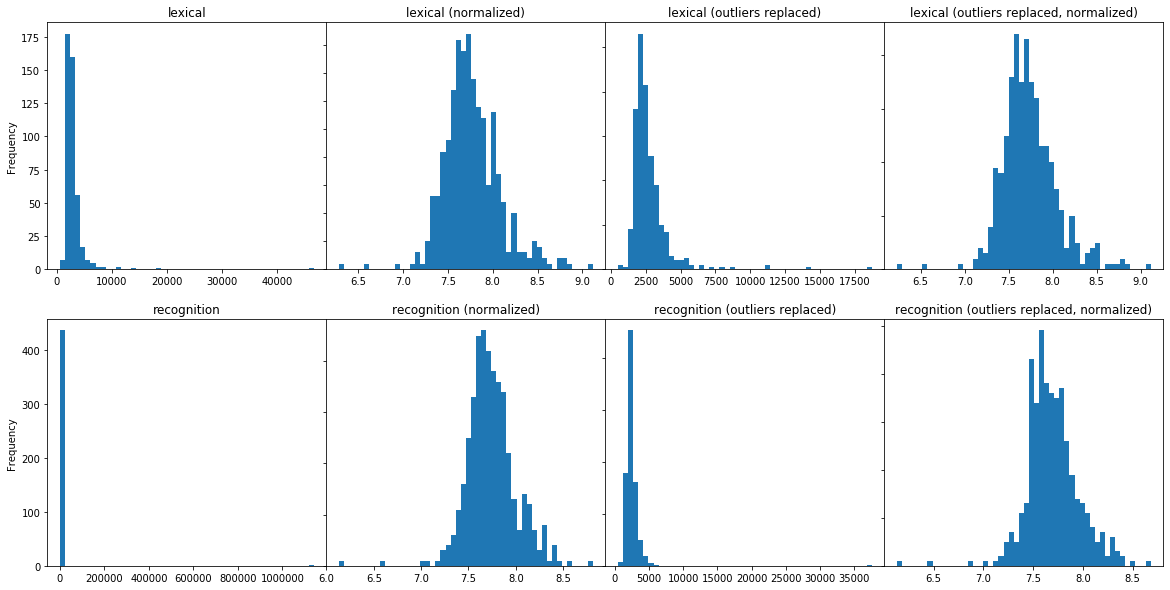

In [8]:
# assess normality of RTs

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0, hspace=0.2)
for i, ttype in enumerate(["lexical", "recognition"]):
    rts = agg[agg["Type"] == ttype]["RT"]
    rts.plot.hist(bins=50, ax=axes[i][0], sharey=True, title="%s" % ttype)
    rts = agg[agg["Type"] == ttype]["RTnorm"]
    rts.plot.hist(bins=50, ax=axes[i][1], sharey=True, title="%s (normalized)" % ttype)
    
    rts = aggwo[aggwo["Type"] == ttype]["RT"]
    rts.plot.hist(bins=50, ax=axes[i][2], sharey=True, title="%s (outliers replaced)" % ttype)
    rts = aggwo[aggwo["Type"] == ttype]["RTnorm"]
    rts.plot.hist(bins=50, ax=axes[i][3], sharey=True, title="%s (outliers replaced, normalized)" % ttype)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for ttype in ["lexical", "recognition"]:
    for col in ["RTnorm"]:
        print("Normality test for %ss in %s task" % (col, ttype))
        display(pg.normality(agg[col]))
        print("Normality test for %ss in %s task (outliers replaced)" % (col, ttype))
        display(pg.normality(aggwo[col]))

Q-Q plot for lexical task
Q-Q plot for recognition task


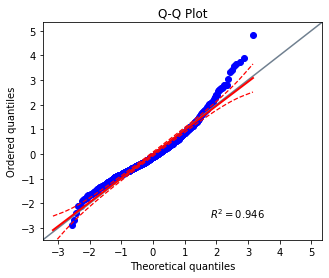

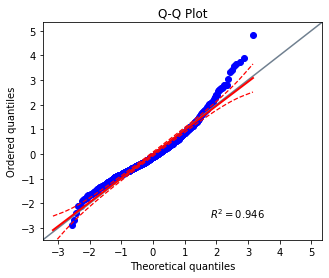

In [22]:
# Q-Q plots

for ttype in ["lexical", "recognition"]:
    for col in ["RTnorm"]:
        print("Q-Q plot for %s task" % ttype)
        pg.qqplot(aggwo["RTnorm"], dist="norm")